# Linear Regression (Single Variable) - Understanding Gradient Descent

## What are we trying to do?

Imagine you have data points showing the relationship between house size (in square feet) and price. You want to find a **line** that best fits these points. This line can help you predict prices for houses you haven't seen yet!

### The Line Equation

Our line is:

$$y = mx + b$$

Where:
- $m$ = slope (how steep the line is)
- $b$ = y-intercept (where the line crosses the y-axis)
- $x$ = input (e.g., house size)
- $y$ = output (e.g., price)

### The Goal

Find the best values for $m$ and $b$ that make our line fit the data as closely as possible!

## How do we measure "closeness"?

We use **Mean Squared Error (MSE)** - it measures how far our predictions are from the actual values.

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

Think of it like this:
1. For each data point, calculate: $(\text{actual price} - \text{predicted price})$
2. Square this difference (makes all errors positive and penalizes big errors more)
3. Average all these squared errors

**Our mission: Make MSE as small as possible!**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Set random seed for reproducibility
np.random.seed(42)

## Step 1: Generate Sample Data

Let's create fake data for house sizes and prices. We'll use the relationship:

$$\text{price} = 50 \times \text{size} + 100 + \text{noise}$$

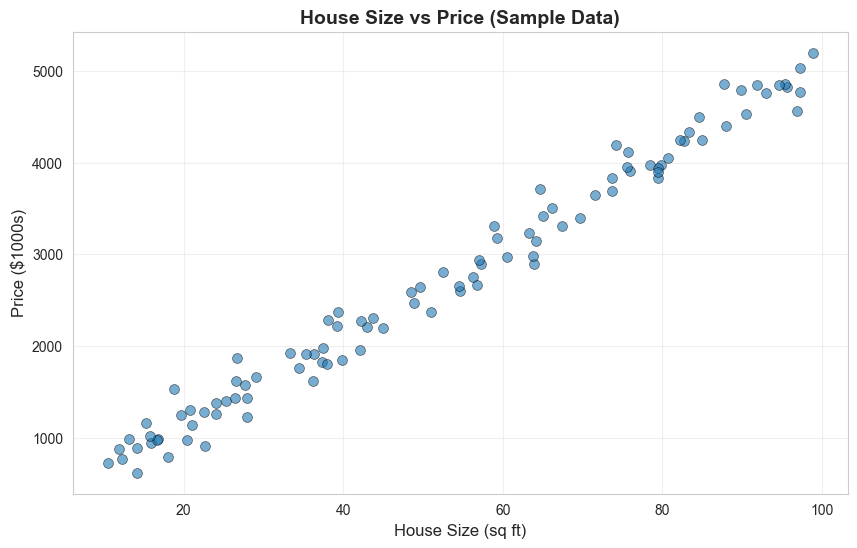

Generated 100 data points
X range: [10.50, 98.82]
y range: [619.64, 5197.36]


In [2]:
# Generate sample data
n_samples = 100
X = np.random.uniform(10, 100, n_samples)  # House sizes from 10 to 100 sq ft
true_m = 50  # True slope
true_b = 100  # True intercept
noise = np.random.normal(0, 200, n_samples)  # Random noise
y = true_m * X + true_b + noise  # Price = 50*size + 100 + noise

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
plt.xlabel('House Size (sq ft)', fontsize=12)
plt.ylabel('Price ($1000s)', fontsize=12)
plt.title('House Size vs Price (Sample Data)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Generated {n_samples} data points")
print(f"X range: [{X.min():.2f}, {X.max():.2f}]")
print(f"y range: [{y.min():.2f}, {y.max():.2f}]")

## Step 2: Understanding Derivatives (The Math Behind Gradient Descent)

### What is a Derivative?

A derivative tells us **how much one thing changes when we slightly change another thing**.

For example:
- If we change $m$ a little bit, how much does the error (MSE) change?
- If we change $b$ a little bit, how much does the error change?

### Why do we care?

The derivative shows us:
- **Direction**: Should we increase or decrease $m$ (or $b$) to reduce error?
- **How much**: How big should our change be?

Think of it like hiking down a mountain:
- The derivative is like looking at the slope under your feet
- It tells you which direction is downhill (where error decreases)
- You take small steps in that direction

## Step 3: Computing the Partial Derivatives

Our error function (MSE) depends on both $m$ and $b$. We need to find how MSE changes with respect to each one.

### The Math (step by step):

**Our prediction:**

$$\hat{y} = mx + b$$

**MSE (Loss Function):**

$$L = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 = \frac{1}{n} \sum_{i=1}^{n}(y_i - (mx_i + b))^2$$

### Derivative with respect to $m$ : $\frac{\partial L}{\partial m}$

Using the chain rule:

1. $$L = \frac{1}{n} \sum_{i=1}^{n}(y_i - (mx_i + b))^2$$

2. Let $u = y - (mx + b)$, so $L = \frac{1}{n} \sum u^2$

3. $$\frac{\partial L}{\partial m} = \frac{1}{n} \sum 2u \cdot \frac{\partial u}{\partial m}$$

4. $$\frac{\partial u}{\partial m} = \frac{\partial(y - mx - b)}{\partial m} = -x$$

5. $$\frac{\partial L}{\partial m} = \frac{1}{n} \sum 2(y - (mx + b)) \cdot (-x) = \frac{-2}{n} \sum (y - \hat{y}) \cdot x$$

**Final formula:**

$$\boxed{\frac{\partial L}{\partial m} = \frac{-2}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i) \cdot x_i}$$

### Derivative with respect to $b$ : $\frac{\partial L}{\partial b}$

1. $$L = \frac{1}{n} \sum (y - (mx + b))^2$$

2. $$\frac{\partial L}{\partial b} = \frac{1}{n} \sum 2(y - (mx + b)) \cdot \frac{\partial(y - mx - b)}{\partial b}$$

3. $$\frac{\partial(y - mx - b)}{\partial b} = -1$$

4. $$\frac{\partial L}{\partial b} = \frac{-2}{n} \sum (y - (mx + b))$$

**Final formula:**

$$\boxed{\frac{\partial L}{\partial b} = \frac{-2}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)}$$

### In Simple Terms:

- **$\frac{\partial L}{\partial m}$**: Average of $(\text{error} \times x)$ tells us how to adjust the slope
- **$\frac{\partial L}{\partial b}$**: Average of $(\text{error})$ tells us how to adjust the intercept

The negative sign means: if error is positive (we're predicting too high), we should decrease $m$ or $b$.

## Step 4: Implementing Gradient Descent

### The Algorithm:

1. Start with random values for $m$ and $b$
2. Calculate predictions: $\hat{y} = mx + b$
3. Calculate error: $\text{error} = y - \hat{y}$
4. Calculate gradients (derivatives):
   $$\frac{\partial L}{\partial m} = \frac{-2}{n} \sum (\text{error} \times x)$$
   $$\frac{\partial L}{\partial b} = \frac{-2}{n} \sum (\text{error})$$
5. Update parameters:
   $$m = m - \alpha \cdot \frac{\partial L}{\partial m}$$
   $$b = b - \alpha \cdot \frac{\partial L}{\partial b}$$
6. Repeat steps 2-5 many times (epochs)

Where $\alpha$ is the **learning rate**: How big our steps are. Too big = we overshoot. Too small = takes forever.

In [3]:
class LinearRegressionGD:
    """Linear Regression using Gradient Descent (Single Variable)"""
    
    def __init__(self, learning_rate=0.001, n_iterations=1000):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.m = None  # slope
        self.b = None  # intercept
        self.cost_history = []  # Track MSE over time
        
    def compute_cost(self, X, y):
        """Calculate Mean Squared Error"""
        n = len(y)
        predictions = self.m * X + self.b
        mse = (1/n) * np.sum((y - predictions) ** 2)
        return mse
    
    def compute_gradients(self, X, y):
        """Calculate partial derivatives"""
        n = len(y)
        predictions = self.m * X + self.b
        errors = y - predictions
        
        # Partial derivative with respect to m
        dm = (-2/n) * np.sum(errors * X)
        
        # Partial derivative with respect to b
        db = (-2/n) * np.sum(errors)
        
        return dm, db
    
    def fit(self, X, y, verbose=True):
        """Train the model using gradient descent"""
        n = len(y)
        
        # Initialize parameters randomly
        self.m = np.random.randn()
        self.b = np.random.randn()
        
        print(f"Initial parameters: m={self.m:.4f}, b={self.b:.4f}")
        
        # Gradient descent
        for i in range(self.n_iterations):
            # Calculate gradients
            dm, db = self.compute_gradients(X, y)
            
            # Update parameters
            self.m = self.m - self.lr * dm
            self.b = self.b - self.lr * db
            
            # Track cost
            cost = self.compute_cost(X, y)
            self.cost_history.append(cost)
            
            # Print progress
            if verbose and (i % 100 == 0 or i == self.n_iterations - 1):
                print(f"Iteration {i:4d} | Cost: {cost:10.2f} | m: {self.m:8.4f} | b: {self.b:8.4f}")
        
        print(f"\nFinal parameters: m={self.m:.4f}, b={self.b:.4f}")
        print(f"True parameters:  m={true_m:.4f}, b={true_b:.4f}")
        
    def predict(self, X):
        """Make predictions"""
        return self.m * X + self.b

## Step 5: Train the Model

In [4]:
# Create and train the model
model = LinearRegressionGD(learning_rate=0.0001, n_iterations=1000)
model.fit(X, y)

Initial parameters: m=0.0130, b=1.4535
Iteration    0 | Cost:  910445.04 | m:  35.3546 | b:   1.9962
Iteration  100 | Cost:   36919.60 | m:  51.2610 | b:   2.8582
Iteration  200 | Cost:   36881.41 | m:  51.2516 | b:   3.4761
Iteration  300 | Cost:   36843.54 | m:  51.2423 | b:   4.0914
Iteration  400 | Cost:   36805.98 | m:  51.2330 | b:   4.7042
Iteration  500 | Cost:   36768.73 | m:  51.2237 | b:   5.3145
Iteration  600 | Cost:   36731.78 | m:  51.2145 | b:   5.9223
Iteration  700 | Cost:   36695.14 | m:  51.2053 | b:   6.5276
Iteration  800 | Cost:   36658.80 | m:  51.1961 | b:   7.1303
Iteration  900 | Cost:   36622.75 | m:  51.1870 | b:   7.7307
Iteration  999 | Cost:   36587.36 | m:  51.1780 | b:   8.3225

Final parameters: m=51.1780, b=8.3225
True parameters:  m=50.0000, b=100.0000


## Step 6: Visualize the Results

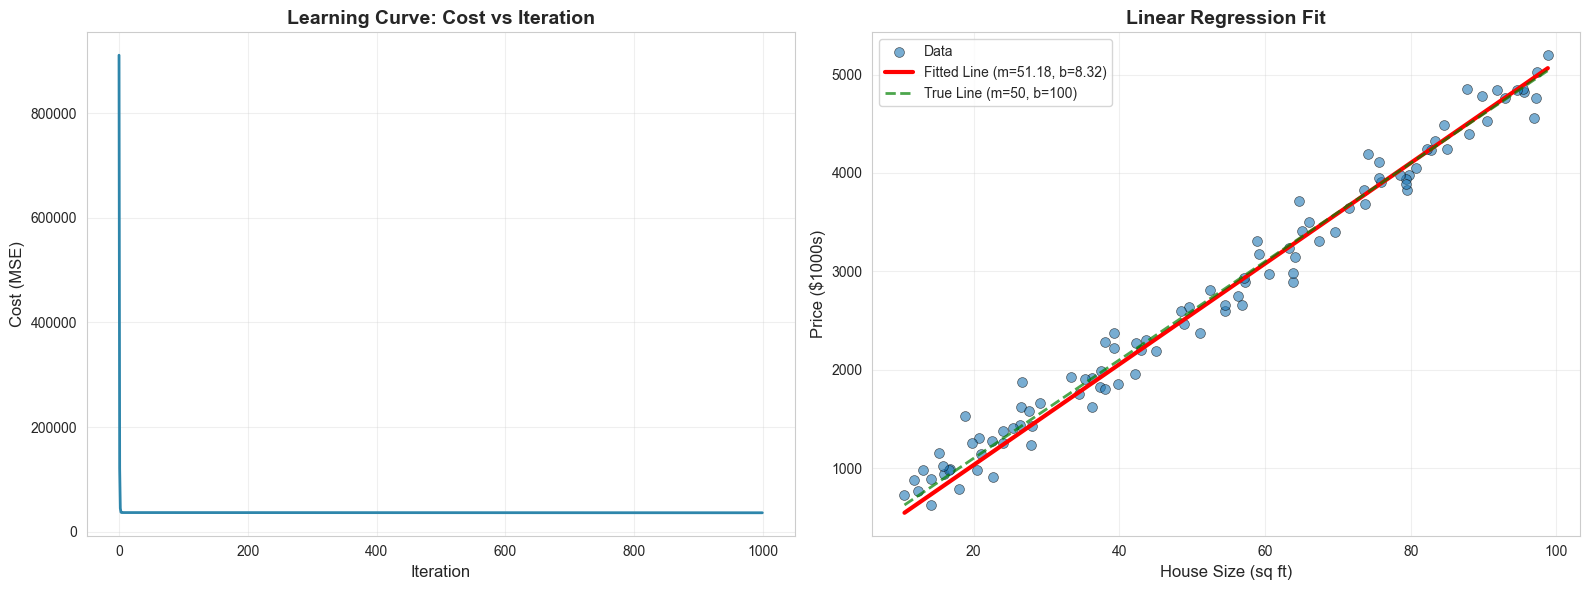

In [5]:
# Plot 1: Cost function over iterations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Cost history
axes[0].plot(model.cost_history, linewidth=2, color='#2E86AB')
axes[0].set_xlabel('Iteration', fontsize=12)
axes[0].set_ylabel('Cost (MSE)', fontsize=12)
axes[0].set_title('Learning Curve: Cost vs Iteration', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Right plot: Final fit
axes[1].scatter(X, y, alpha=0.6, s=50, edgecolors='black', linewidth=0.5, label='Data')
X_line = np.linspace(X.min(), X.max(), 100)
y_pred = model.predict(X_line)
axes[1].plot(X_line, y_pred, 'r-', linewidth=3, label=f'Fitted Line (m={model.m:.2f}, b={model.b:.2f})')
axes[1].plot(X_line, true_m * X_line + true_b, 'g--', linewidth=2, alpha=0.7, label=f'True Line (m={true_m}, b={true_b})')
axes[1].set_xlabel('House Size (sq ft)', fontsize=12)
axes[1].set_ylabel('Price ($1000s)', fontsize=12)
axes[1].set_title('Linear Regression Fit', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 7: Visualizing Gradient Descent Journey

Let's visualize how our parameters ($m$ and $b$) changed during training!

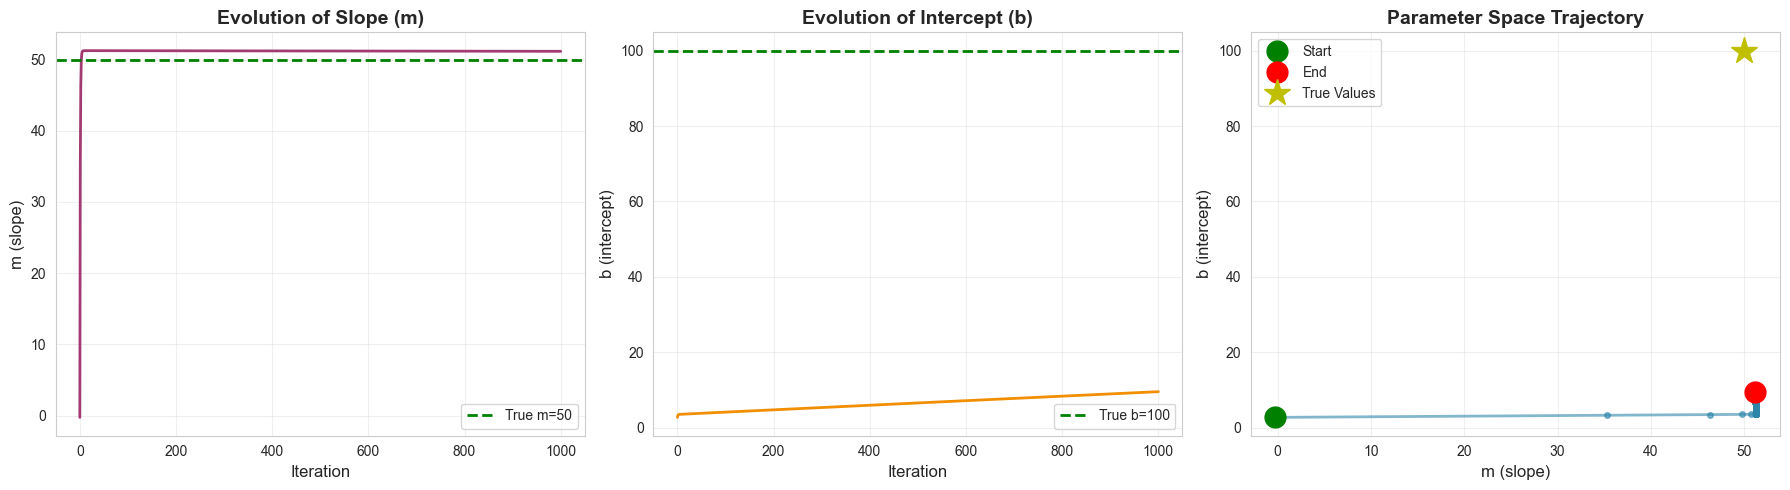


Parameter Journey:
Started at:  m=-0.2647, b=2.7202
Ended at:    m=51.1595, b=9.5418
True values: m=50.0000, b=100.0000


In [6]:
# Train again but save parameter history
class LinearRegressionGD_Tracked(LinearRegressionGD):
    """Extended version that tracks parameter evolution"""
    
    def fit(self, X, y, verbose=False):
        n = len(y)
        self.m = np.random.randn()
        self.b = np.random.randn()
        
        # Track parameters over time
        self.m_history = [self.m]
        self.b_history = [self.b]
        
        for i in range(self.n_iterations):
            dm, db = self.compute_gradients(X, y)
            self.m = self.m - self.lr * dm
            self.b = self.b - self.lr * db
            
            self.m_history.append(self.m)
            self.b_history.append(self.b)
            
            cost = self.compute_cost(X, y)
            self.cost_history.append(cost)

# Train tracked model
model_tracked = LinearRegressionGD_Tracked(learning_rate=0.0001, n_iterations=1000)
model_tracked.fit(X, y)

# Visualize parameter evolution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot m evolution
axes[0].plot(model_tracked.m_history, linewidth=2, color='#A23B72')
axes[0].axhline(y=true_m, color='green', linestyle='--', linewidth=2, label=f'True m={true_m}')
axes[0].set_xlabel('Iteration', fontsize=12)
axes[0].set_ylabel('m (slope)', fontsize=12)
axes[0].set_title('Evolution of Slope (m)', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot b evolution
axes[1].plot(model_tracked.b_history, linewidth=2, color='#F18F01')
axes[1].axhline(y=true_b, color='green', linestyle='--', linewidth=2, label=f'True b={true_b}')
axes[1].set_xlabel('Iteration', fontsize=12)
axes[1].set_ylabel('b (intercept)', fontsize=12)
axes[1].set_title('Evolution of Intercept (b)', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot trajectory in parameter space
axes[2].plot(model_tracked.m_history, model_tracked.b_history, 'o-', 
             linewidth=2, markersize=4, alpha=0.6, color='#2E86AB')
axes[2].plot(model_tracked.m_history[0], model_tracked.b_history[0], 
             'go', markersize=15, label='Start', zorder=5)
axes[2].plot(model_tracked.m_history[-1], model_tracked.b_history[-1], 
             'ro', markersize=15, label='End', zorder=5)
axes[2].plot(true_m, true_b, 'y*', markersize=20, label='True Values', zorder=5)
axes[2].set_xlabel('m (slope)', fontsize=12)
axes[2].set_ylabel('b (intercept)', fontsize=12)
axes[2].set_title('Parameter Space Trajectory', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nParameter Journey:")
print(f"Started at:  m={model_tracked.m_history[0]:.4f}, b={model_tracked.b_history[0]:.4f}")
print(f"Ended at:    m={model_tracked.m_history[-1]:.4f}, b={model_tracked.b_history[-1]:.4f}")
print(f"True values: m={true_m:.4f}, b={true_b:.4f}")

## Key Takeaways

### What we learned:

1. **Linear Regression** finds the best line $y = mx + b$ to fit data

2. **Mean Squared Error (MSE)** measures how good our line is (lower = better):
   $$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

3. **Derivatives (Gradients)** tell us:
   - Which direction to adjust our parameters
   - How sensitive the error is to changes in $m$ or $b$

4. **Gradient Descent** is like hiking down a mountain:
   - Start at a random position (random $m$ and $b$)
   - Look at the slope (calculate gradients)
   - Take a small step downhill (update parameters)
   - Repeat until you reach the bottom (minimum error)

5. **Learning Rate** $\alpha$ controls step size:
   - Too large → we might overshoot and miss the minimum
   - Too small → takes very long to converge

### The Math in Simple Terms:

$$\boxed{\frac{\partial L}{\partial m} = \frac{-2}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i) \cdot x_i}$$

- "If our predictions are too high $(y - \hat{y}$ is negative$)$, and $x$ is positive, then $\frac{\partial L}{\partial m}$ is positive"
- "So we subtract positive gradient from $m$, making $m$ smaller"
- "This makes our predictions smaller, reducing the error!"

$$\boxed{\frac{\partial L}{\partial b} = \frac{-2}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)}$$

- "If our predictions are too high on average, $\frac{\partial L}{\partial b}$ is positive"
- "So we subtract positive gradient from $b$, shifting the line down"
- "This reduces the error!"

### Next Steps:

Now that you understand single-variable linear regression, we'll extend this to:
- Multiple variables (multiple features)
- Logistic regression (for classification)
- Neural networks (stacking these ideas!)